# Exercise 4.1 England Divorces, Linear Regression

Objective: Calculate w0 and w1 from data of England divorces.

Particular objectives:
1. Read the data from a csv file and convert the data to numpy arrays.
2. Plot the data
3. Define the average function
4. Calculate w0 and w1.
5. Plot the line: Y = w0 + w1 * x in the previous graph.
6. Calculate the MSE
7. Predict the number of divorces of the years 1990 and 2000

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
#1. Read the data from a csv file and convert the data to numpy arrays.

dataset = pd.read_csv('divorces.csv')

dataset


,year,divorces
0,1975,120.5
1,1976,126.7
2,1977,129.1
3,1978,143.7
4,1979,138.7
5,1980,148.3


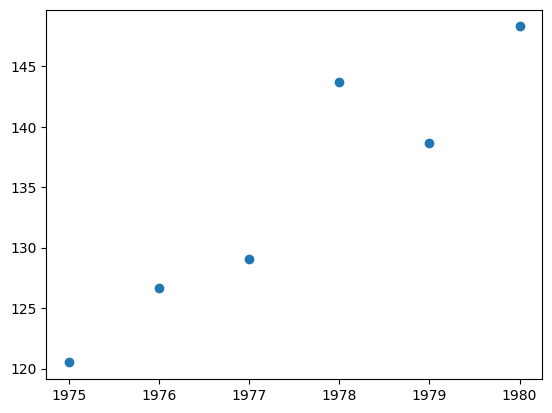

In [3]:
#2. Plot the data

plt.scatter(dataset['year'],dataset['divorces'], marker='o') # type: ignore

In [4]:
#3. Define the average function
def average(x):
    return np.average(x)


#Probando funcion average
x = np.array(dataset['year'])
y = np.array(dataset['divorces'])



In [5]:
# 4. Calculate w0 and w1
w1 = (average(x * y) - average(x) * average(y)) / \
    (average(x * x) - average(x) * average(x))

w0 = average(y) - w1 * average(x)

print('w0 =', w0, 'w1 =', w1)


w0 = -10577.900000562204 w1 = 5.417142857427158


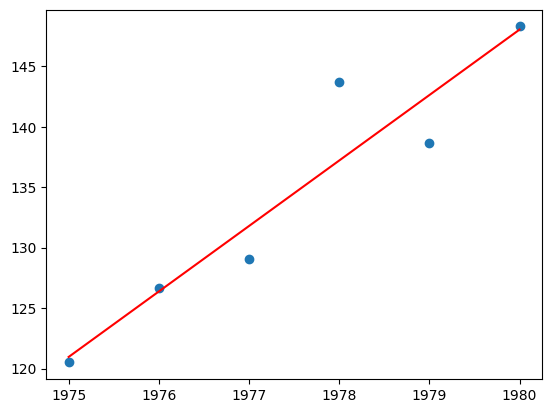

In [6]:
#5. Plot the line: Y = w0 + w1 * x in the previous graph.

Y = w0 + w1 * x

plt.plot(x, Y, c='red')
plt.scatter(dataset['year'],dataset['divorces'], marker='o') # type: ignore


In [7]:
#6. Calculate the MSE

MSE = (1/ len(x)) * np.sum((y - Y) **2)

print('MSE = ', MSE)

MSE =  10.862476190474043


In [8]:
#7. Predict the number of divorces of the years 1990 and 2000
y1990 = w0 + w1 * 1990
y2000 = w0 + w1 * 2000

print('1990 Divorces =', y1990)
print('2000 Divorces =', y2000)

1990 Divorces = 202.21428571784054
2000 Divorces = 256.3857142921115


## Tarea 

Del dataset 'House_train.csv', obtener un dataset de dos columnas siguiendo las siguientes instrucciones:

1. Leer el dataset
2. En un nuevo dataframe guardar solo las columnas 'TotalBsmtSF' y 'SalePrice'. La entrada (X) es 'TotalBsmtSF', y la salida (Y) será 'SalePrice'
3. Hacer una gráfica con puntos para observar los datos
4. Del dataframe de 2 columnas eliminar los registros donde 'TotalBsmtSF' sea igual a cero, y al valor máximo de 'TotalBsmtSF'. Deberán quedar 1422 registros.
5. Volver a graficar los datos y observar que se han eliminado los registros del paso anterior
6. Calcular W0 y W1 para este dataset
7. Graficar los datos y la línea obtenida del modelo del paso anterior
8. Calcular MSE
9. Realizar 3 predicciones que tú definas para valores de X.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
#1. Leer el dataset
dataset = pd.read_csv('House_train.csv')
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
#2. En un nuevo dataframe guardar solo las columnas 'TotalBsmtSF' y 'SalePrice'. La entrada (X) es 'TotalBsmtSF', y la salida (Y) será 'SalePrice'
dataset = dataset[['TotalBsmtSF', 'SalePrice']]
dataset

,TotalBsmtSF,SalePrice
0,856,208500
1,1262,181500
2,920,223500
3,756,140000
4,1145,250000
...,...,...
1455,953,175000
1456,1542,210000
1457,1152,266500
1458,1078,142125


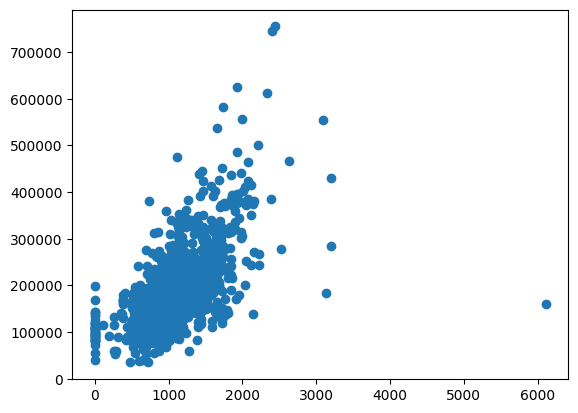

In [12]:
# 3. Hacer una gráfica con puntos para observar los datos
plt.scatter(dataset['TotalBsmtSF'],dataset['SalePrice'], marker='o') # type: ignore

In [13]:
# 4. Del dataframe de 2 columnas eliminar los registros donde 'TotalBsmtSF' sea igual a cero, y al valor máximo de 'TotalBsmtSF'. Deberán quedar 1422 registros.



dataset = dataset[(dataset['TotalBsmtSF'] != 0) & (dataset['TotalBsmtSF'] != dataset['TotalBsmtSF'].max())]
dataset



,TotalBsmtSF,SalePrice
0,856,208500
1,1262,181500
2,920,223500
3,756,140000
4,1145,250000
...,...,...
1455,953,175000
1456,1542,210000
1457,1152,266500
1458,1078,142125


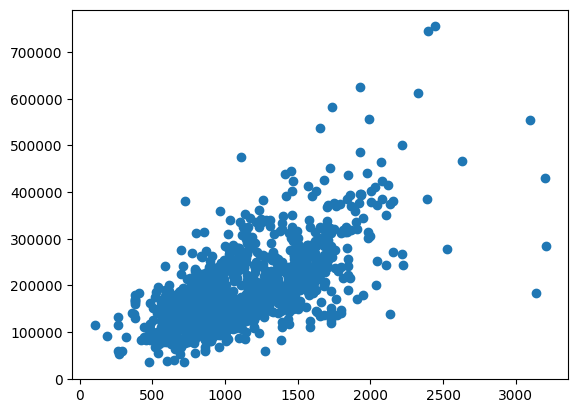

In [14]:
# 5. Volver a graficar los datos y observar que se han eliminado los registros del paso anterior
plt.scatter(dataset['TotalBsmtSF'],dataset['SalePrice'], marker='o') # type: ignore

In [15]:
# 6. Calcular W0 y W1 para este dataset
def average(x):
    return np.average(x)

x = np.array(dataset['TotalBsmtSF'])
y = np.array(dataset['SalePrice'])

w1 = (average(x * y) - average(x) * average(y)) / \
    (average(x * x) - average(x) * average(x))

w0 = average(y) - w1 * average(x)

print('w0 =', w0, 'w1 =', w1)


w0 = 39307.72399486514 w1 = 132.77966614531726


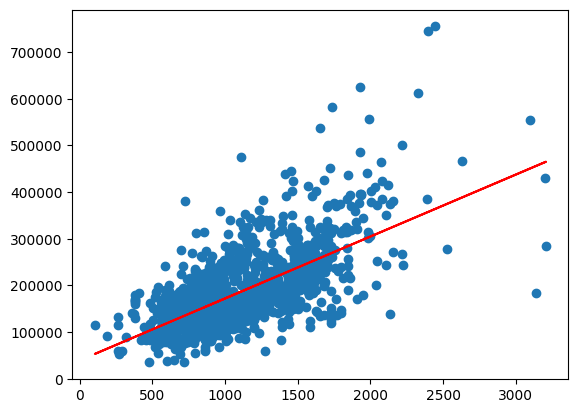

In [16]:
# 7. Graficar los datos y la línea obtenida del modelo del paso anterior

Y = w0 + w1 * x

plt.plot(x, Y, c='red')
plt.scatter(dataset['TotalBsmtSF'],dataset['SalePrice'], marker='o') # type: ignore

In [17]:
# 8. Calcular MSE
MSE = (1/ len(x)) * np.sum((y - Y) **2)

print('MSE = ', MSE)

MSE =  3660099551.433109


In [18]:
# 9. Realizar 3 predicciones que tú definas para valores de X.
x1300 = w0 + w1 * 1300
x1456 = w0 + w1 * 1456
x2000 = w0 + w1 * 2000

print('1300 TotalBsmtSF =', x1300)
print('1456 TotalBsmtSF =', x1456)
print('2000 TotalBsmtSF =', x2000)

1300 TotalBsmtSF = 211921.2899837776
1456 TotalBsmtSF = 232634.91790244708
2000 TotalBsmtSF = 304867.05628549965
